In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow import keras

%matplotlib inline

In [2]:
series = pd.read_csv("../data/processed/EURUSD_processed.csv")
series["Close"]

0        0.000958
1        0.000100
2       -0.000133
3       -0.000025
4       -0.000083
           ...   
37357    0.000090
37358    0.000066
37359    0.000016
37360   -0.000057
37361    0.000090
Name: Close, Length: 37362, dtype: float64

In [3]:
series.shape

(37362, 24)

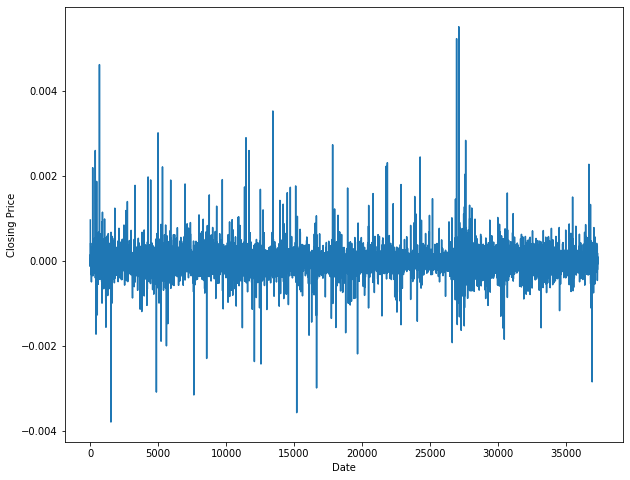

In [4]:
plt.figure(figsize=(10, 8))
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.plot(series.index[:], series["Close"][:])

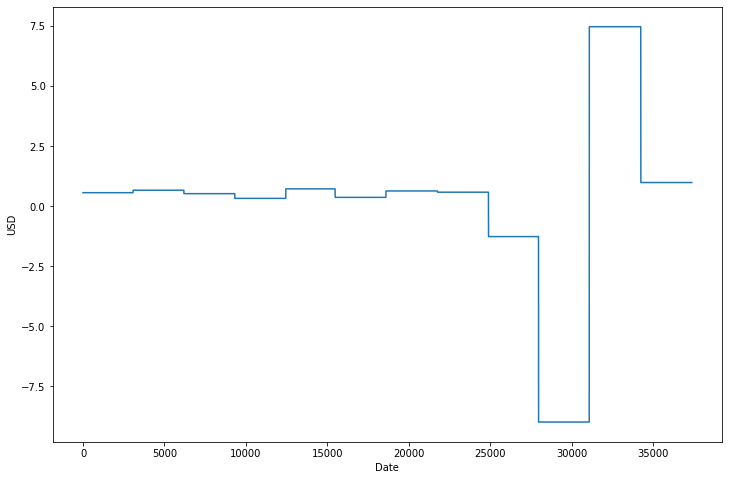

In [5]:
plt.figure(figsize=(12, 8))
plt.xlabel("Date")
plt.ylabel("USD")
plt.plot(series.index, series["USD_GDP"])

In [6]:
batch_size = 32
series = series[series.shape[0] % batch_size:]
series = series.drop("Time", axis=1)
series

,EUR_CPI,EUR_GDP,EUR Interest Rate,EUR_PPI,EUR Unemployment Rate,EUR News Sentiment,EUR Twitter Sentiment,RSI,EMA_10,Volume,...,Low,EMA_100,A/D Index,USD_CPI,USD Interest Rate,USD News Sentiment,USD Unemployment Rate,USD_PPI,USD_GDP,USD Twitter Sentiment
18,1.3,0.737765,1.0339,0.005859,8.6,0.0,0.001246,75.940201,1.445526e-06,3006.0,...,-0.000175,1.312852e-07,58145.149582,2.070508,2.58,0.000000,4.0,0.012921,0.565669,-0.002488
19,1.3,0.737765,1.0339,0.005859,8.6,0.0,0.001180,72.599846,1.485825e-06,5028.0,...,-0.000266,1.360469e-07,58062.647043,2.070508,2.58,0.000000,4.0,0.012921,0.565669,-0.001762
20,1.3,0.737765,1.0339,0.005859,8.6,0.0,0.001121,72.695517,1.578763e-06,6055.0,...,-0.000258,1.387508e-07,37636.720716,2.070508,2.58,0.000000,4.0,0.012921,0.565669,-0.003451
21,1.3,0.737765,1.0339,0.005859,8.6,0.0,0.001068,74.079968,1.637180e-06,6071.0,...,-0.000183,1.484510e-07,16562.115808,2.070508,2.58,0.000000,4.0,0.012921,0.565669,-0.003287
22,1.3,0.737765,1.0339,0.005859,8.6,0.0,0.001020,77.312970,1.542935e-06,5187.0,...,-0.000166,1.466277e-07,1955.818876,2.070508,2.58,0.000000,4.0,0.012921,0.565669,-0.002591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37357,-0.3,-0.697576,-0.0913,0.001949,8.3,0.0,0.000000,69.299369,7.632054e-06,1589.0,...,-0.000409,1.239241e-05,64927.456120,1.362005,0.93,0.000128,6.7,0.022647,0.988378,-0.001073
37358,-0.3,-0.697576,-0.0913,0.001949,8.3,0.0,0.000000,69.088460,4.074039e-05,1941.0,...,-0.000205,-2.018817e-06,61014.484780,1.362005,0.93,0.000128,6.7,0.022647,0.988378,-0.001073
37359,-0.3,-0.697576,-0.0913,0.001949,8.3,0.0,0.000000,69.094920,-1.727098e-05,679.0,...,-0.000082,7.893409e-06,55243.856680,1.362005,0.93,0.000128,6.7,0.022647,0.988378,-0.001073
37360,-0.3,-0.697576,-0.0913,0.001949,8.3,0.0,0.000000,69.151768,-1.784520e-07,1448.0,...,-0.000164,-4.327320e-06,49734.711960,1.362005,0.93,0.000128,6.7,0.022647,0.988378,-0.000852


In [7]:
#features.describe().T

In [8]:
"""featureScaler = MinMaxScaler()
closeScaler = MinMaxScaler()
features = pd.DataFrame(featureScaler.fit_transform(features),
                       columns=features.columns,
                       index=features.index)
target = pd.DataFrame(closeScaler.fit_transform(target),
                     columns=target.columns,
                     index=target.index)"""

'featureScaler = MinMaxScaler()\ncloseScaler = MinMaxScaler()\nfeatures = pd.DataFrame(featureScaler.fit_transform(features),\n                       columns=features.columns,\n                       index=features.index)\ntarget = pd.DataFrame(closeScaler.fit_transform(target),\n                     columns=target.columns,\n                     index=target.index)'

In [9]:
#processed = pd.concat([features, target], axis=1, sort=False)
#processed

In [10]:
train_size = 934 * batch_size
test_size = 233 * batch_size
train_size = 841 * batch_size
val_size = 93 * batch_size
window_size = 8 * batch_size
df_train = series[:- val_size - test_size]
df_val = series[- val_size - test_size - window_size:- test_size]
df_test = series[- test_size - window_size:]
print(f'df_train.shape {df_train.shape}, df_validation.shape {df_val.shape}, df_test.shape {df_test.shape}')

df_train.shape (26912, 23), df_validation.shape (3232, 23), df_test.shape (7712, 23)


In [11]:
df_val

,EUR_CPI,EUR_GDP,EUR Interest Rate,EUR_PPI,EUR Unemployment Rate,EUR News Sentiment,EUR Twitter Sentiment,RSI,EMA_10,Volume,...,Low,EMA_100,A/D Index,USD_CPI,USD Interest Rate,USD News Sentiment,USD Unemployment Rate,USD_PPI,USD_GDP,USD Twitter Sentiment
26674,1.2,-3.728702,0.1365,-0.004757,7.2,0.000000,-0.000157,21.534010,-0.000003,1905.0,...,-0.000139,-2.310821e-06,4485.585937,2.334874,1.50,0.00019,3.5,-0.009330,-1.262655,-0.000116
26675,1.2,-3.728702,0.1365,-0.004757,7.2,0.000000,-0.000157,21.538730,0.000006,5683.0,...,-0.000629,-9.148381e-07,5499.703258,2.334874,1.50,0.00019,3.5,-0.009330,-1.262655,0.000163
26676,1.2,-3.728702,0.1365,-0.004757,7.2,0.000000,-0.000554,21.553503,-0.000011,4319.0,...,-0.000148,8.697995e-06,7091.010629,2.334874,1.50,0.00019,3.5,-0.009330,-1.262655,0.000766
26677,1.2,-3.728702,0.1365,-0.004757,7.2,0.000000,-0.000275,21.695714,-0.000021,6242.0,...,-0.000277,-3.759615e-06,-2472.789729,2.334874,1.50,0.00019,3.5,-0.009330,-1.262655,0.000347
26678,1.2,-3.728702,0.1365,-0.004757,7.2,0.000000,-0.000275,21.842798,0.000052,6164.0,...,-0.000287,-1.084428e-06,-1332.489889,2.334874,1.50,0.00019,3.5,-0.009330,-1.262655,0.000819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29901,0.1,-11.709141,0.4796,-0.001965,7.6,-0.000106,0.001787,53.600972,0.000016,17622.0,...,-0.000865,3.370717e-06,-15696.922685,0.117926,0.67,-0.00044,13.3,-0.032192,-8.986117,-0.001187
29902,0.1,-11.709141,0.4796,-0.001965,7.6,-0.000106,0.001787,53.586060,-0.000068,13940.0,...,-0.000747,3.815930e-06,-17332.986609,0.117926,0.67,-0.00072,13.3,-0.032192,-8.986117,-0.001455
29903,0.1,-11.709141,0.4796,-0.001965,7.6,-0.000106,0.001787,53.533514,0.000039,12283.0,...,-0.000629,8.523871e-07,-18643.197609,0.117926,0.67,-0.00072,13.3,-0.032192,-8.986117,-0.001476
29904,0.1,-11.709141,0.4796,-0.001965,7.6,-0.000106,0.001787,53.594501,-0.000034,7272.0,...,-0.000237,1.133604e-06,-17779.347435,0.117926,0.67,-0.00072,13.3,-0.032192,-8.986117,-0.001807


In [12]:
scaler = MinMaxScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train),
                       columns=df_train.columns,
                       index=df_train.index)
df_val = pd.DataFrame(scaler.transform(df_val),
                     columns=df_val.columns,
                     index=df_val.index)
df_test = pd.DataFrame(scaler.transform(df_test),
                      columns=df_test.columns,
                      index=df_test.index)

In [13]:
df_train

,EUR_CPI,EUR_GDP,EUR Interest Rate,EUR_PPI,EUR Unemployment Rate,EUR News Sentiment,EUR Twitter Sentiment,RSI,EMA_10,Volume,...,Low,EMA_100,A/D Index,USD_CPI,USD Interest Rate,USD News Sentiment,USD Unemployment Rate,USD_PPI,USD_GDP,USD Twitter Sentiment
18,0.375,1.0,0.651298,0.954826,1.000000,0.519385,0.700592,0.757451,0.576341,0.016104,...,0.955499,0.508893,0.616652,0.385043,0.75,0.495955,0.555556,0.789097,0.919783,0.371524
19,0.375,1.0,0.651298,0.954826,1.000000,0.519385,0.693030,0.713814,0.576361,0.027105,...,0.931043,0.508928,0.616481,0.385043,0.75,0.495955,0.555556,0.789097,0.919783,0.415864
20,0.375,1.0,0.651298,0.954826,1.000000,0.519385,0.686223,0.715064,0.576407,0.032692,...,0.933278,0.508948,0.574024,0.385043,0.75,0.495955,0.555556,0.789097,0.919783,0.312730
21,0.375,1.0,0.651298,0.954826,1.000000,0.519385,0.680063,0.733150,0.576436,0.032779,...,0.953304,0.509021,0.530218,0.385043,0.75,0.495955,0.555556,0.789097,0.919783,0.322748
22,0.375,1.0,0.651298,0.954826,1.000000,0.519385,0.674462,0.775384,0.576389,0.027970,...,0.957779,0.509007,0.499858,0.385043,0.75,0.495955,0.555556,0.789097,0.919783,0.365223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26925,0.000,0.0,0.214759,0.000000,0.142857,0.504933,0.563542,0.185414,0.593302,0.053530,...,0.898847,0.502007,0.491640,0.013427,0.00,0.511866,1.000000,0.073522,0.000000,0.560584
26926,0.000,0.0,0.214759,0.000000,0.142857,0.504933,0.563542,0.187228,0.562359,0.048878,...,0.922755,0.477260,0.506746,0.013427,0.00,0.511866,1.000000,0.073522,0.000000,0.560584
26927,0.000,0.0,0.214759,0.000000,0.142857,0.504933,0.563542,0.190806,0.623638,0.049292,...,0.934810,0.665297,0.502491,0.013427,0.00,0.511866,1.000000,0.073522,0.000000,0.560584
26928,0.000,0.0,0.214759,0.000000,0.142857,0.504933,0.563542,0.193165,0.588602,0.068312,...,0.707289,0.537484,0.442338,0.013427,0.00,0.511866,1.000000,0.073522,0.000000,0.560584


In [14]:
def create_dataset(df, window_size):
    X, y = [], []
    for i in range(len(df) - window_size):
        v = df.iloc[i:(i + window_size)].values
        X.append(v)
        y.append(df["Close"].iloc[i + window_size])
    return np.array(X), np.array(y)

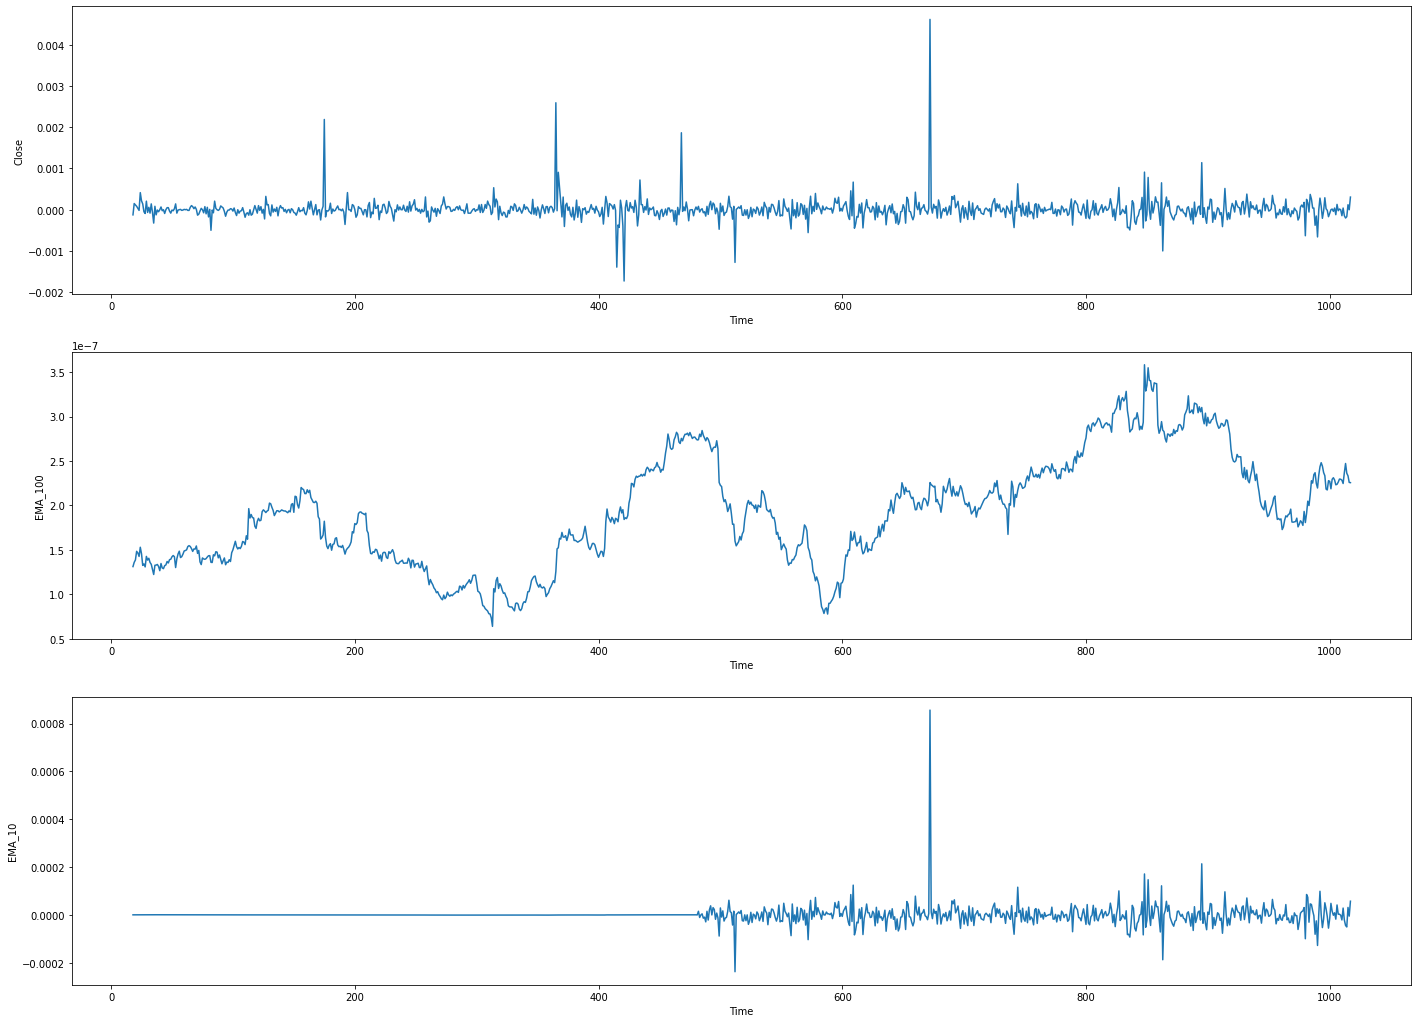

In [15]:
fig = plt.figure(figsize=(24, 18))
ax1, ax2, ax3 = fig.subplots(3)
ax1.set(xlabel='Time', ylabel='Close')
ax2.set(xlabel='Time', ylabel='EMA_100')
ax3.set(xlabel='Time', ylabel='EMA_10')
ax1.plot(series['Close'][:1000])
ax2.plot(series['EMA_100'][:1000])
ax3.plot(series['EMA_10'][:1000])

In [16]:
X_train, y_train = create_dataset(df_train, window_size)
X_val, y_val = create_dataset(df_val, window_size)
X_test, y_test = create_dataset(df_test, window_size)

In [17]:
X_train.shape

(26656, 256, 23)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(128, activation="relu", input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))
model.compile(loss="mse", optimizer='Adam')
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=batch_size, shuffle=False)

Epoch 1/5
833/833 [==============================] - 271s 326ms/step - loss: 0.0026 - val_loss: 0.6301
Epoch 2/5
833/833 [==============================] - 277s 332ms/step - loss: 0.0014 - val_loss: 1.5015
Epoch 3/5
833/833 [==============================] - 275s 330ms/step - loss: 9.6301e-04 - val_loss: 0.0230
Epoch 4/5
833/833 [==============================] - 276s 331ms/step - loss: 7.1839e-04 - val_loss: 0.0276
Epoch 5/5
587/833 [====================>.........] - ETA: 1:14 - loss: 6.7554e-04

In [ ]:
fig = plt.figure(figsize=(16, 10))
ax1 = fig.subplots(1)
ax1.set_title('Model Loss')
ax1.set(xlabel='Epoch', ylabel='Loss')
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Val Loss')
ax1.legend()

In [ ]:
y_pred = model.predict(X_test)
fig = plt.figure(figsize=(16, 10))
ax1 = fig.subplots(1)
ax1.set_title('Predicted Closing Price')
ax1.set(xlabel='Time', ylabel='Close')
ax1.plot(y_pred, label='Prediction')
ax1.plot(y_test, label='Actual')
ax1.legend()

In [ ]:
"""train_size = int(len(processed) * 0.9)
test_size = len(processed) - train_size
train, test = processed.iloc[0:train_size], processed.iloc[train_size:len(processed)]
print(len(train), len(test))"""

In [ ]:
"""def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)"""

In [ ]:
"""time_steps = 480

X_train, y_train = create_dataset(train, train.Close, time_steps)
X_test, y_test = create_dataset(test, test.Close, time_steps)

print(X_train, y_train)"""

In [ ]:
"""model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')"""

In [ ]:
"""history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)"""

In [ ]:
"""plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])"""

In [ ]:
"""plt.figure(figsize=(16, 10))
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)"""

In [ ]:
#plt.plot(y_pred)

In [ ]:
#plt.plot(y_test)

In [ ]:
#df = pd.DataFrame()

In [ ]:
#df["Pred Scaled"] = np.pad(y_pred.reshape(y_pred.shape[0]), (time_steps, 0), mode='constant', constant_values=np.nan)
#df["Pred Scaled"]

In [ ]:
#df['Pred Returns'] = closeScaler.inverse_transform(df[['Pred Scaled']].values)
#df["Pred Returns"]

In [ ]:
#target

In [ ]:
#df['Pred'] = target["Close"].mul(np.exp(df['Pred Returns'].shift(-1))).shift(1)

In [ ]:
#plt.plot(df["Pred"])